In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense,LSTM,Dropout

In [52]:
data=pd.read_csv("/traingoogle.csv")
data.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [54]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1258 non-null   object 
 1   Open    1258 non-null   float64
 2   High    1258 non-null   float64
 3   Low     1258 non-null   float64
 4   Close   1258 non-null   object 
 5   Volume  1258 non-null   object 
dtypes: float64(3), object(3)
memory usage: 59.1+ KB


In [55]:
data["Close"]=pd.to_numeric(data.Close,errors='coerce')
data = data.dropna()
trainData = data.iloc[:,4:5].values

In [56]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1149 entries, 0 to 1257
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1149 non-null   object 
 1   Open    1149 non-null   float64
 2   High    1149 non-null   float64
 3   Low     1149 non-null   float64
 4   Close   1149 non-null   float64
 5   Volume  1149 non-null   object 
dtypes: float64(4), object(2)
memory usage: 62.8+ KB


In [57]:
sc = MinMaxScaler(feature_range=(0,1))
trainData = sc.fit_transform(trainData)
trainData.shape

(1149, 1)

In [58]:
X_train = []
y_train = []

for i in range (60,1149): #60 : timestep // 1149 : length of the data
    X_train.append(trainData[i-60:i,0])
    y_train.append(trainData[i,0])

X_train,y_train = np.array(X_train),np.array(y_train)

In [59]:
X_train = np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1)) #adding the batch_size axis
X_train.shape

(1089, 60, 1)

In [60]:
model = Sequential()

model.add(LSTM(units=100, return_sequences = True, input_shape =(X_train.shape[1],1)))
model.add(Dropout(0.2))

model.add(LSTM(units=100, return_sequences = True))
model.add(Dropout(0.2))

model.add(LSTM(units=100, return_sequences = True))
model.add(Dropout(0.2))

model.add(LSTM(units=100, return_sequences = False))
model.add(Dropout(0.2))

model.add(Dense(units =1))
model.compile(optimizer='adam',loss="mean_squared_error")

In [61]:
hist = model.fit(X_train, y_train, epochs = 20, batch_size = 32, verbose=2)

Epoch 1/20
35/35 - 16s - loss: 0.0332 - 16s/epoch - 457ms/step
Epoch 2/20
35/35 - 8s - loss: 0.0122 - 8s/epoch - 228ms/step
Epoch 3/20
35/35 - 7s - loss: 0.0086 - 7s/epoch - 200ms/step
Epoch 4/20
35/35 - 8s - loss: 0.0080 - 8s/epoch - 222ms/step
Epoch 5/20
35/35 - 7s - loss: 0.0070 - 7s/epoch - 195ms/step
Epoch 6/20
35/35 - 8s - loss: 0.0080 - 8s/epoch - 229ms/step
Epoch 7/20
35/35 - 8s - loss: 0.0068 - 8s/epoch - 226ms/step
Epoch 8/20
35/35 - 7s - loss: 0.0067 - 7s/epoch - 196ms/step
Epoch 9/20
35/35 - 8s - loss: 0.0068 - 8s/epoch - 225ms/step
Epoch 10/20
35/35 - 7s - loss: 0.0056 - 7s/epoch - 192ms/step
Epoch 11/20
35/35 - 8s - loss: 0.0061 - 8s/epoch - 226ms/step
Epoch 12/20
35/35 - 9s - loss: 0.0055 - 9s/epoch - 261ms/step
Epoch 13/20
35/35 - 7s - loss: 0.0055 - 7s/epoch - 191ms/step
Epoch 14/20
35/35 - 8s - loss: 0.0058 - 8s/epoch - 223ms/step
Epoch 15/20
35/35 - 7s - loss: 0.0060 - 7s/epoch - 188ms/step
Epoch 16/20
35/35 - 8s - loss: 0.0053 - 8s/epoch - 226ms/step
Epoch 17/20
35/

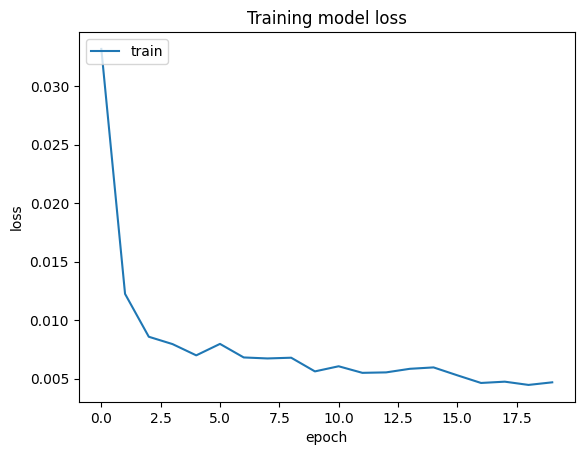

In [62]:
plt.plot(hist.history['loss'])
plt.title('Training model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

In [63]:
testData=pd.read_csv('/testgoogle.csv')

In [65]:
testData["Close"]=pd.to_numeric(testData.Close,errors='coerce')
testData = testData.dropna()
testData = testData.iloc[:,4:5]
y_test = testData.iloc[60:,0:].values
#input array for the model
inputClosing = testData.iloc[:,0:].values
inputClosing_scaled = sc.transform(inputClosing)
inputClosing_scaled.shape
X_test = []
length = len(testData)
timestep = 60
for i in range(timestep,length):
    X_test.append(inputClosing_scaled[i-timestep:i,0])
X_test = np.array(X_test)
X_test = np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
X_test.shape

(192, 60, 1)

In [66]:
y_pred=model.predict(X_test)

6/6 [==============================] - 2s 61ms/step


In [67]:
predicted_price=sc.inverse_transform(y_pred)

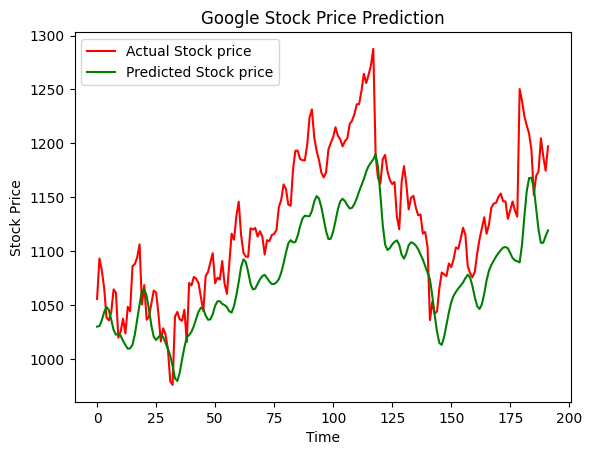

In [68]:
plt.plot(y_test,color="red",label="Actual Stock price")
plt.plot(predicted_price,color="green",label="Predicted Stock price")
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()